### **CREATING DATA SET WITH 2 LAKH ENTERIES**

In [4]:
!pip install faker #this libarary is used to generate unique fake names

In [5]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from tqdm import tqdm

# Initialize Faker
fake = Faker()

# Set number of rows
num_rows = 50_000

# Use a set to ensure unique names
unique_names = set()
while len(unique_names) < num_rows:
    name = fake.name()
    unique_names.add(name)

names = list(unique_names)

# Generate Age (21 to 60)
ages = np.random.randint(21, 61, size=num_rows)

# Generate Year of Experience (0 to Age - 21)
experience = np.array([random.randint(0, age - 21) for age in tqdm(ages)])

# Generate salary (base + experience * factor + random noise)
base_salary = 25000
salary = [
    base_salary + (exp * random.randint(2000, 5000)) + random.randint(-2000, 2000)
    for exp in tqdm(experience)
]

# Create DataFrame
df = pd.DataFrame({
    "Name": names,
    "Age": ages,
    "Year of Experience": experience,
    "Current Salary": salary
})

# Save to Excel
excel_filename = "salary_dataset.xlsx"
df.to_excel(excel_filename, index=False)

#for downloading the data set in the system
#from google.colab import files
#files.download(excel_filename)

100%|██████████| 50000/50000 [00:00<00:00, 185236.23it/s]


### **CLEANING THE DATASET**
1. Loading The dataset
2. Check for misising Values
3. Check for duplicate Values
4. Handle Outliers
5. Format and Normalize data type

In [6]:
# 1. loading the dataset
from google.colab import drive
drive.mount('/content/drive')
df.to_excel(excel_filename, index=False)

# viewing
df.head()

Mounted at /content/drive


,Name,Age,Year of Experience,Current Salary
0,Andrea Kim,31,5,38646
1,Eric Sanchez,25,3,32182
2,Lori Lawson,24,2,32939
3,Joseph Wheeler,42,9,64418
4,Cheryl Swanson,42,2,34873


In [7]:
# 2.check for missing Values
print(df.isnull().sum())

Name                  0
Age                   0
Year of Experience    0
Current Salary        0
dtype: int64


In [8]:
# 3.Check for duplicate Values
print(f"Duplicated rows: {df.duplicated().sum()}")


Duplicated rows: 0


In [9]:
# 4.Handle Outliers
Q1 = df['Current Salary'].quantile(0.25)
Q3 = df['Current Salary'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 +1.5*IQR
df = df[(df['Current Salary']>= lower_bound)& (df['Current Salary']<= upper_bound)]

In [10]:
# 5.Format and Normalize Data type.
df['Age'] = df['Age'].astype(int)
df['Current Salary'] = df['Current Salary'].astype(float)
df['Year of Experience'] = df['Year of Experience'].astype(float)

### **SANITIZING THE DATASET**
1. Remove leading/trailing spaces.
2. Convert text to a consistent format(Title case).
3. Validation of Data Ranges:
Ensure numerical values fall within acceptable limits(e.g., Age between 18–60).
Check logical relationships (e.g., Years of Experience ≤ Age).
4. Ensure the dataset shape (number of rows/columns) is as expected.


In [11]:
# 1.Removing leading trail
df['Name'] = df['Name'].str.strip()

In [12]:
# 2.Coverting text to consistent format
df['Name'] = df['Name'].str.title()

In [13]:
# 3. Validation of Data Ranges

# Keep Age between 18–65
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]
# Ensure Years of Experience <= Age
df = df[df['Year of Experience'] <= df['Age']]

In [14]:
# 5. Ensuring datashape
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())

Dataset Shape: (48467, 4)

Column Info:
<class 'pandas.core.frame.DataFrame'>
Index: 48467 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                48467 non-null  object 
 1   Age                 48467 non-null  int64  
 2   Year of Experience  48467 non-null  float64
 3   Current Salary      48467 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ MB
None


## **EXPLORATORY DATA ANALYSIS**
1. Correlation Analysis
2. Distribution Plots
3. Relationship Visualization
4. Outlier Detection (Boxplots)

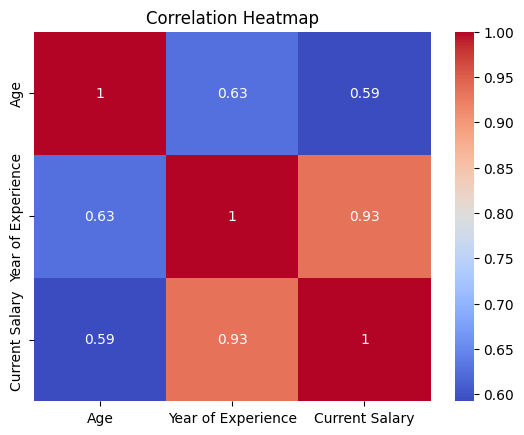

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#1.Correlation Analysis
corr = df[['Age', 'Year of Experience', 'Current Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

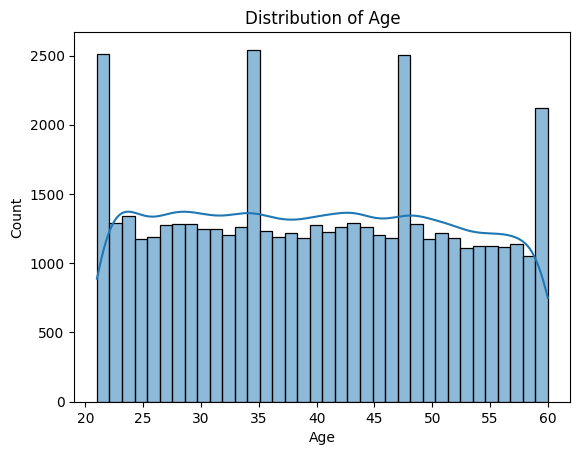

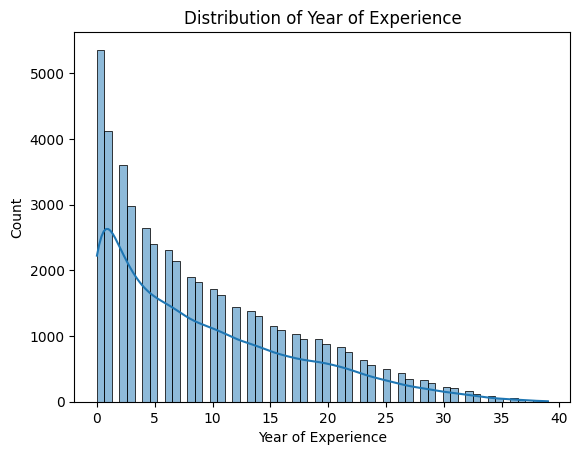

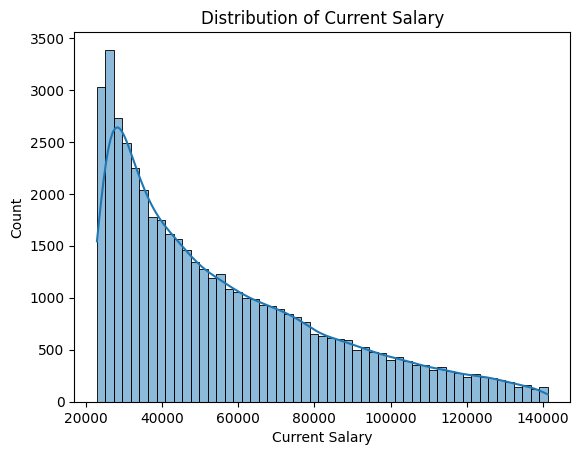

In [ ]:
#2.Distribution Plots
for col in ['Age', 'Year of Experience', 'Current Salary']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


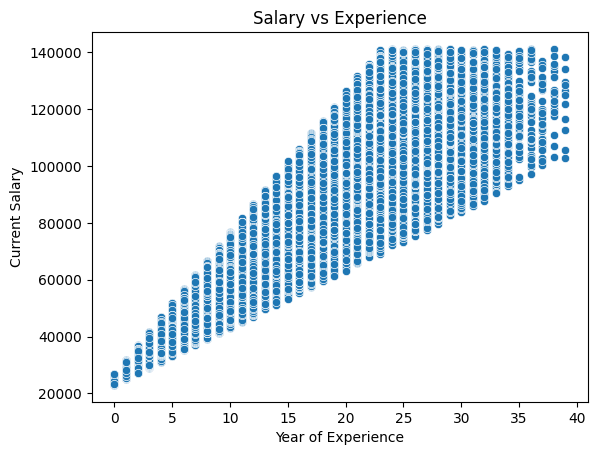

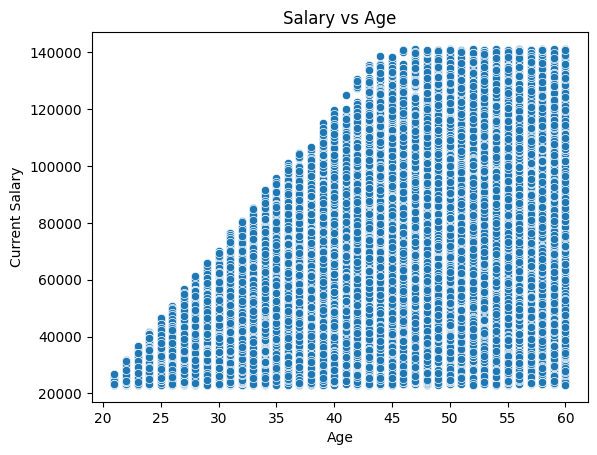

In [ ]:
#3.Relationship Visualization
sns.scatterplot(x='Year of Experience', y='Current Salary', data=df)
plt.title('Salary vs Experience')
plt.show()

sns.scatterplot(x='Age', y='Current Salary', data=df)
plt.title('Salary vs Age')
plt.show()


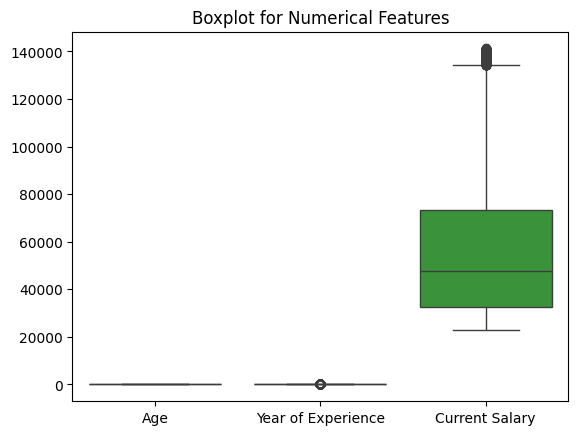

In [ ]:
#4.Outlier Detection (Boxplots)
sns.boxplot(data=df[['Age', 'Year of Experience', 'Current Salary']])
plt.title('Boxplot for Numerical Features')
plt.show()


## **TRAINING THE DATASET FOR SALARY PREDICTION**
USING 4 REGRESSION MODELS TO CHECK WHICH GIVES THE MORE ACCURATE RESULT:-
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor

**NOTE**:- AMONG THESE MODELS THE ONE WHICH GIVES THE HIGHEST R2 VALUE WILL HAS THE LOWESTEST ERROR AND HENCE WILL BE USED FR MAKING PREDICTIONS




In [ ]:
# Spliting the Dataset
X = df[['Age', 'Year of Experience',]]
y = df['Current Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
#1.Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Linear Regression Results:
MAE: 7013.59
RMSE: 10258.56
R² Score: 0.87


In [ ]:
#2.Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Results:")
print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Decision Tree Regressor Results:
MAE: 6768.19
RMSE: 9894.28
R² Score: 0.88


In [ ]:
#3.Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Regressor Results:
MAE: 6771.88
RMSE: 9899.84
R² Score: 0.88


In [ ]:
#4. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Results:")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")


Gradient Boosting Regressor Results:
MAE: 6712.47
RMSE: 9759.88
R² Score: 0.88


In [ ]:
# Saving the Gradient model for dashboard generation
import joblib

joblib.dump(gb, 'gradient_boosting_model.pkl')
print("MODEL SAVED SUCESSFULLY")

MODEL SAVED SUCESSFULLY


In [ ]:
# download the saved model
from google.colab import files
files.download('gradient_boosting_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **MAKING PREDICTION**
(The Gradient Boosting Regressor model got the highest R2 value so, the most accurate Salary prediction will be given by Gradient Boosting Regressor Model. However, we can even predict the current salary by also using other models which we used for training.)

In [ ]:
import pandas as pd

def predict_salary(model, age, experience ):
    # Create a single-row DataFrame for prediction
    new_data = pd.DataFrame({
        'Age': [age],
        'Year of Experience': [experience],
    })

    # Predict using the trained model
    predicted_salary = model.predict(new_data)[0]
    print(f"Predicted Future Salary: ₹{predicted_salary:,.2f}")
    return predicted_salary


In [ ]:
#just to display
#print(" Linear Regression Prediction:")
#predict_salary(lr, 32, 7)


 Linear Regression Prediction:
Predicted Future Salary: ₹49,005.99


np.float64(49005.99064638367)

In [ ]:
#print("Decision Tree Prediction:")
#predict_salary(dt, 32, 7)


Decision Tree Prediction:
Predicted Future Salary: ₹48,863.12


np.float64(48863.117647058825)

In [ ]:
#print("Random Forest Prediction:")
#predict_salary(rf, 32, 7)


Random Forest Prediction:
Predicted Future Salary: ₹48,894.11


np.float64(48894.10846220199)

In [ ]:
print("Gradient Boosting Prediction:")
predict_salary(gb, 32,7)


Gradient Boosting Prediction:
Predicted Future Salary: ₹49,299.13


np.float64(49299.12868403281)